In [1]:
import tensorflow as tf
tf.__version__
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = keras.datasets.imdb

In [3]:
max_word = 10000

In [4]:
(x_train, y_train), (x_test, y_test) = data.load_data(num_words=max_word)

In [5]:
x_train.shape

(25000,)

文本训练成密集向量

In [6]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, 300)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, 300)

In [8]:
model = keras.models.Sequential()

In [9]:
model.add(layers.Embedding(10000, 50, input_length=300))  # 25000, 300, 50

In [10]:
model.add(layers.GlobalAveragePooling1D())

In [11]:
model.add(layers.Dense(128, activation='relu'))

In [12]:
model.add(layers.Dropout(0.3))

In [13]:
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               6528      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 506,657
Trainable params: 506,657
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['acc']
)

In [16]:
history = model.fit(x_train, y_train, epochs=15, batch_size=256, validation_data=(x_test, y_test))

W0720 22:45:02.519704 12972 deprecation.py:323] From D:\Python\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 3s 116us/sample - loss: 0.6635 - acc: 0.6605 - val_loss: 0.5757 - val_acc: 0.7780
Epoch 2/15
25000/25000 [==============================] - 2s 90us/sample - loss: 0.4266 - acc: 0.8438 - val_loss: 0.3452 - val_acc: 0.8647
Epoch 3/15
25000/25000 [==============================] - 2s 90us/sample - loss: 0.2814 - acc: 0.8916 - val_loss: 0.2968 - val_acc: 0.8791
Epoch 4/15
25000/25000 [==============================] - 2s 91us/sample - loss: 0.2304 - acc: 0.9129 - val_loss: 0.2830 - val_acc: 0.8836
Epoch 5/15
25000/25000 [==============================] - 2s 91us/sample - loss: 0.1952 - acc: 0.9289 - val_loss: 0.2869 - val_acc: 0.8820
Epoch 6/15
25000/25000 [==============================] - 2s 89us/sample - loss: 0.1706 - acc: 0.9406 - val_loss: 0.2915 - val_acc: 0.8812
Epoch 7/15
25000/25000 [==============================] - 2s 90us/sample - loss: 0.1509 - acc: 0.9474 - val_loss: 0

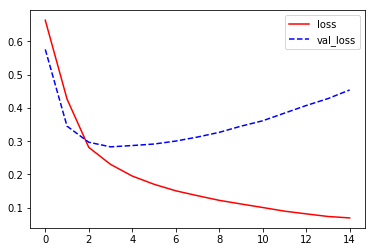

In [17]:
plt.plot(history.epoch, history.history.get('loss'), 'r', label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b--', label='val_loss')
plt.legend()

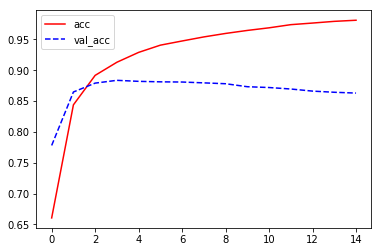

In [18]:
plt.plot(history.epoch, history.history.get('acc'), 'r', label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), 'b--', label='val_acc')
plt.legend()